# 1.データのダウンロード
### 1.1.ライブラリのインポート

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### 1.2.データセットのダウンロード

In [2]:
#データセットをダウンロード
df_data = pd.read_csv('./data/data1.csv')
df_x = df_data.iloc[:,0:-1]
df_y = df_data.iloc[:,-1]
#分類問題なので、ターゲットはバイナリにする。
df_y = df_y >= 0.8 #直近のレースの順位が上位20%なら"True"となる。
df_y = df_y * 1   #上位20%が"1"となる。
df_data = pd.concat([df_x,df_y],axis=1)

# 2.特徴量エンジニアリング
### 2.1.データ加工

In [5]:
#20%をテストデータ、80%を学習・バリデーションデータに分割
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)

#説明変数の標準化
scaler_X = StandardScaler()
x_train = scaler_X.fit_transform(x_train)
x_test = scaler_X.transform(x_test)

In [35]:
y_test

7    0
2    1
Name: target, dtype: int32

### 2.2.特徴量同士の関係を確認

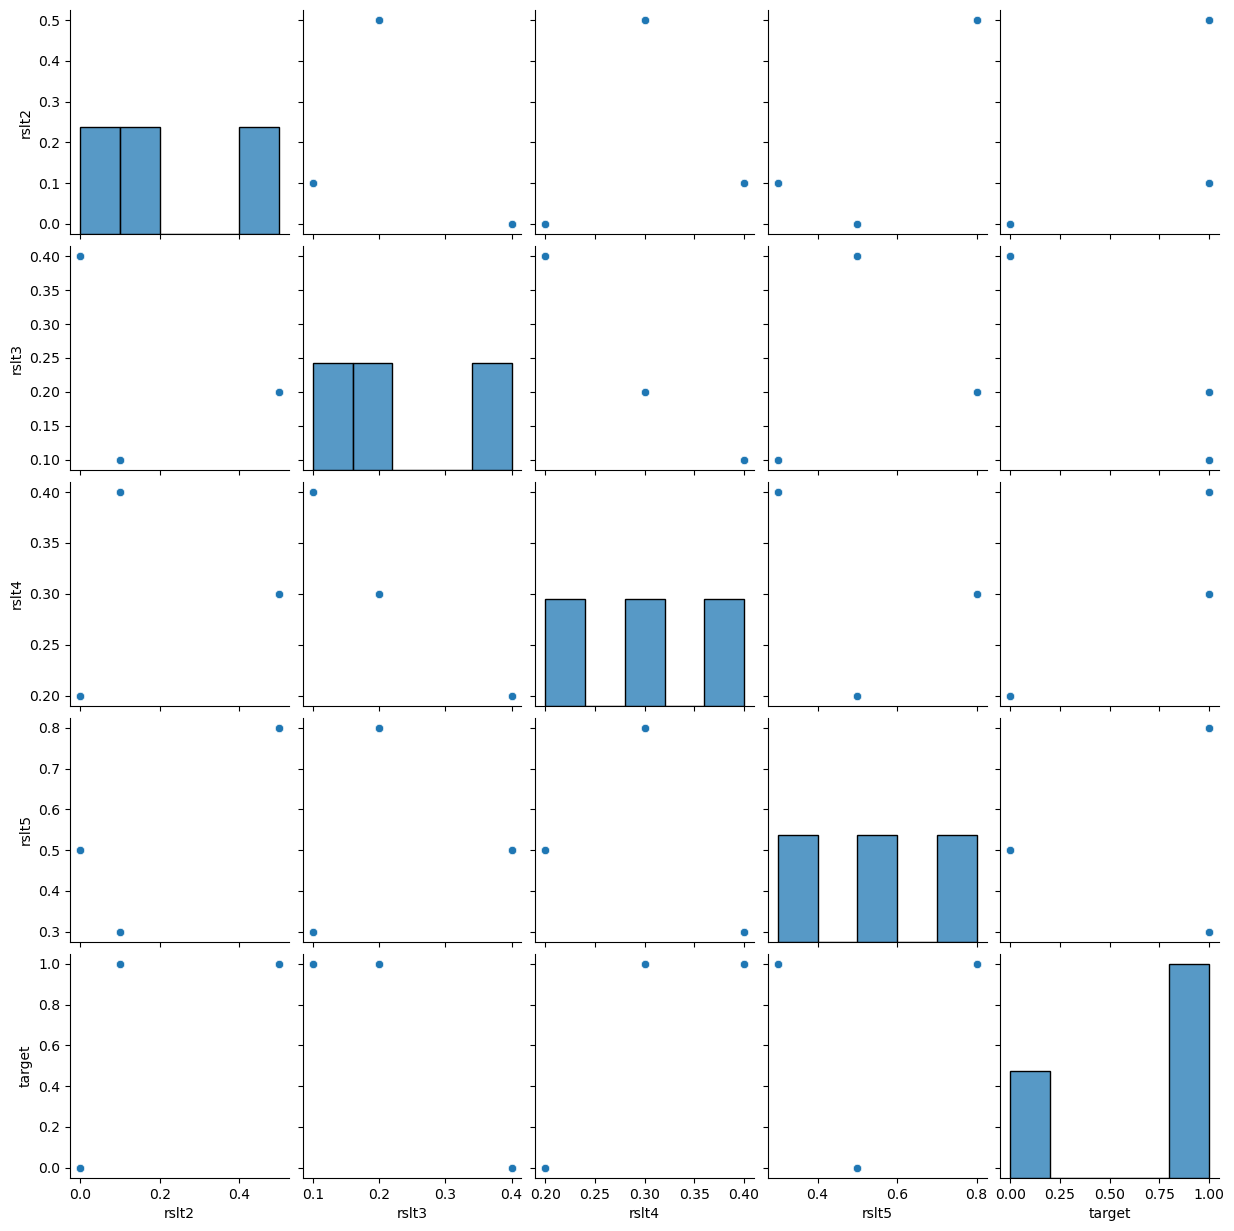

In [6]:
#いくつかの変数で変数同士の関係性を見てみる。
sns.pairplot(df_data)
plt.show()

# 3.モデル作成

In [7]:
model = LogisticRegression() 
params_grid = {
    'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
}
search = GridSearchCV(model, params_grid, cv=2)
search.fit(x_train,y_train)
#モデルの構築と学習
#lr = LogisticRegression() 
#lr.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]})

# 4.予測の評価
### 4.1.結果の表示

In [8]:
results = pd.DataFrame(search.cv_results_)
display(results)
bestparam = search.best_params_
print("best parameter is {}".format(bestparam))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004002,3.000975e-03,0.000000,0.000000,0.001,{'C': 0.001},0.75,0.666667,0.708333,0.041667,5
1,0.001006,4.887581e-06,0.000000,0.000000,0.01,{'C': 0.01},0.75,0.666667,0.708333,0.041667,5
2,0.001000,4.768372e-07,0.000000,0.000000,0.1,{'C': 0.1},0.75,0.666667,0.708333,0.041667,5
3,0.001505,4.966259e-04,0.000502,0.000502,1,{'C': 1},1.00,1.000000,1.000000,0.000000,1
4,0.001000,2.384186e-07,0.000000,0.000000,10.0,{'C': 10.0},1.00,1.000000,1.000000,0.000000,1
5,0.002000,1.192093e-07,0.000000,0.000000,100.0,{'C': 100.0},1.00,1.000000,1.000000,0.000000,1
6,0.001512,5.006790e-04,0.000500,0.000500,1000.0,{'C': 1000.0},1.00,1.000000,1.000000,0.000000,1


best parameter is {'C': 1}


In [9]:
#訓練データ,テストデータに対する予測
y_pred_train = search.predict(x_train)
y_pred_test = search.predict(x_test)
#予測結果を表示
#print("訓練データのターゲット")
#print(np.array(y_train))
#print("訓練データのターゲットの予測値")
#print(y_pred_train)
#print("テストデータのターゲット")
#print(np.array(y_test))
#print("テストデータのターゲットの予測値")
#print(y_pred_test)

In [12]:
#訓練データ
#print('accuracy：', accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('precision：', precision_score(y_true=y_train, y_pred=y_pred_train))
#print('recall：', recall_score(y_true=y_train, y_pred=y_pred_train))
#print('f1 score：', f1_score(y_true=y_train, y_pred=y_pred_train))
print('confusion matrix = \n', confusion_matrix(y_true=y_train, y_pred=y_pred_train))

#テストデータ
#print('accuracy：', accuracy_score(y_true=y_test, y_pred=y_pred_test))
print('precision：', precision_score(y_true=y_test, y_pred=y_pred_test))
#print('recall：', recall_score(y_true=y_test, y_pred=y_pred_test))
#print('f1 score：', f1_score(y_true=y_test, y_pred=y_pred_test))
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_test))

precision： 1.0
confusion matrix = 
 [[2 0]
 [0 5]]
precision： 1.0
confusion matrix = 
 [[1 0]
 [0 1]]


スレッショルド　：　[1.92681216 0.92681216 0.19240212]


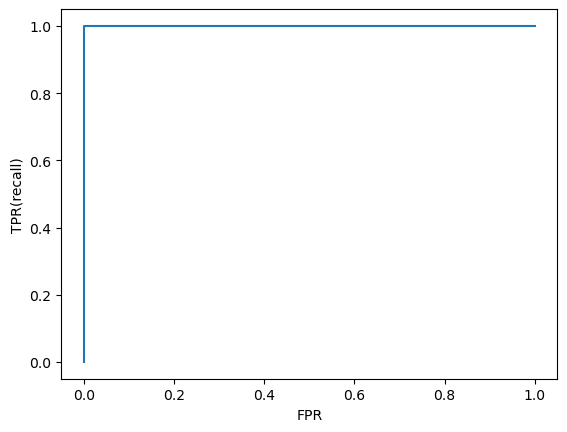

AUC = 1.0


In [29]:
#fpr:偽陽性率（陰性のものの中で、陽性と予想したものの比率）
#tpr:真陽性率（陽性と予想したものの中で、陽性のものの比率）
fpr, tpr, thresholds = roc_curve(y_test, search.predict_proba(x_test)[:,1])
print("スレッショルド　：　{}".format(thresholds))
#ROC Curveの描画
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()
#テストデータのAUCの計算　←精度の評価として用いればよい
auc = roc_auc_score(y_test, search.predict_proba(x_test)[:, 1])
print("AUC = {}".format(auc))

# メトリックについて
モデルの評価はROCカーブの面積で評価すればよいと思う。
スレッショルドは再現率が高くなるように設定すればよいと思っている。
（再現率：上位20%と予想した中で、実際に上位20%であったものの比率）

In [55]:
best_threshold = 0.9
best_y_pred_test = (search.predict_proba(x_test)[:,1] > best_threshold) * 1

In [56]:
print('BEST PRECISION：', precision_score(y_true=y_test, y_pred=best_y_pred_test))

BEST PRECISION： 1.0
